In [1]:
import retentioneering
import numpy as np
import pandas as pd

### Загрузка датасета, заодно отсортируем

In [2]:
df = pd.read_csv('Dataset for Career Factory 22032022.csv')
df = df.sort_values(by=['client_id','event_dttm'])

df[['account_creationdate','client_creationdate','event_dttm']] = df[['account_creationdate','client_creationdate','event_dttm']].apply(pd.to_datetime)

In [56]:
df.columns

Index(['Unnamed: 0', 'account_id', 'account_creationdate', 'client_id',
       'client_creationdate', 'admin_status', 'country_group', 'industry',
       'hear_source', 'support_provided', 'initial_channel',
       'ig_followerscount', 'ig_enable_dttm', 'traffic_source',
       'first_device_type_of_user', 'first_account_for_user',
       'current_account_status', 'ltv_predicted', 'ig_activation_dttm',
       'trial_dttm', 'paid_dttm', 'pro_dttm', 'first_ig_flow_publish_dttm',
       'event_name', 'event_dttm'],
      dtype='object')

In [58]:
df.head()

,Unnamed: 0,account_id,account_creationdate,client_id,client_creationdate,admin_status,country_group,industry,hear_source,support_provided,...,first_account_for_user,current_account_status,ltv_predicted,ig_activation_dttm,trial_dttm,paid_dttm,pro_dttm,first_ig_flow_publish_dttm,event_name,event_dttm
10,10,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,True,free,9679,NaN,NaN,NaN,NaN,NaN,web.page_questionnaire.todo_list_personalizati...,2021-10-05 20:40:49.401840
9,9,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,True,free,9679,NaN,NaN,NaN,NaN,NaN,todo_list_item.verify_email.done,2021-10-05 20:41:26.531285
8,8,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,True,free,9679,NaN,NaN,NaN,NaN,NaN,todo_list_item.verify_email.done,2021-10-05 20:41:26.531415
7,7,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,True,free,9679,NaN,NaN,NaN,NaN,NaN,todo_list_item.connect_ig_account.done,2021-10-05 20:41:26.531569
6,6,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,True,free,9679,NaN,NaN,NaN,NaN,NaN,todo_list_item.connect_ig_account.done,2021-10-05 20:41:26.531576


### По заданию нам нужна только первая сессия. Ее идентификатора нет, поэтому вытащим из первого события и даты регистрации

In [3]:
df_red = df[['client_id','client_creationdate','event_dttm']]

Сколько дней прошло с момента регистрации?

In [4]:
df_red['since_reg'] = (df_red.event_dttm - df_red.client_creationdate).dt.days

C:\Users\80209221\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Делим на сессии по 30 минут

In [5]:
df_red['session'] = (df_red.groupby('client_id')['event_dttm']
                   .transform(lambda x: x.diff().gt('30Min').cumsum())
                )

In [88]:
df_red

,client_id,client_creationdate,event_dttm,since_reg,session
10,100000,2021-10-05 20:33:30.173973,2021-10-05 20:40:49.401840,0.0,0
9,100000,2021-10-05 20:33:30.173973,2021-10-05 20:41:26.531285,0.0,0
8,100000,2021-10-05 20:33:30.173973,2021-10-05 20:41:26.531415,0.0,0
7,100000,2021-10-05 20:33:30.173973,2021-10-05 20:41:26.531569,0.0,0
6,100000,2021-10-05 20:33:30.173973,2021-10-05 20:41:26.531576,0.0,0
...,...,...,...,...,...
869274,115969,2021-10-21 17:43:01.304537,2021-10-21 17:44:33.261467,0.0,0
869273,115969,2021-10-21 17:43:01.304537,2021-10-21 17:44:48.501725,0.0,0
869272,115969,2021-10-21 17:43:01.304537,2021-10-21 17:44:48.738427,0.0,0
869271,115969,2021-10-21 17:43:01.304537,2021-10-21 17:45:01.412871,0.0,0


### Добавляем в датасет количество дней от регистрации и номер сессии

In [6]:
df['since_reg'] = df_red.since_reg
df['session'] = df_red.session

### Поработаем над эвентами: разобьем на группы 

In [11]:
df['event_type'] = df['event_name'].str.split('.').str[0]
df['event_subtype'] = df['event_name'].str.split('.').str[1]
df["event_type_subtype"] = df["event_type"] + '.' + df["event_subtype"]

### Посмотрим, какие действия они совершали в свою первую сессию

Оставим только события:
 - в первую сессию первого дня с момента регистрации
 - только для первого аккаунта для пользователя
 - не являются "системными" (так как системные события даны без расшифровки)

In [14]:
df_clean = df.loc[(df['since_reg'] == 0) & (df['session'] == 0) & (df['first_account_for_user'] == True)]
df_clean = df_clean.drop(df_clean[df_clean.event_type == 'system'].index)

#### Уберем те события, которые совершили меньше 10 раз

In [62]:
event_count = df_clean.event_type_subtype.value_counts().reset_index()
event_less_10 = event_count[event_count.event_type_subtype < 10]['index'].values
df_clean = df_clean.drop(df_clean[df_clean.event_type_subtype.isin(event_less_10)].index)

In [102]:
df_clean.head()

,Unnamed: 0,account_id,account_creationdate,client_id,client_creationdate,admin_status,country_group,industry,hear_source,support_provided,...,paid_dttm,pro_dttm,first_ig_flow_publish_dttm,event_name,event_dttm,since_reg,session,event_type,event_subtype,event_type_subtype
10,10,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,NaN,NaN,NaN,web.page_questionnaire.todo_list_personalizati...,2021-10-05 20:40:49.401840,0.0,0,web,page_questionnaire,web.page_questionnaire
9,9,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,NaN,NaN,NaN,todo_list_item.verify_email.done,2021-10-05 20:41:26.531285,0.0,0,todo_list_item,verify_email,todo_list_item.verify_email
8,8,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,NaN,NaN,NaN,todo_list_item.verify_email.done,2021-10-05 20:41:26.531415,0.0,0,todo_list_item,verify_email,todo_list_item.verify_email
7,7,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,NaN,NaN,NaN,todo_list_item.connect_ig_account.done,2021-10-05 20:41:26.531569,0.0,0,todo_list_item,connect_ig_account,todo_list_item.connect_ig_account
6,6,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,NaN,NaN,NaN,todo_list_item.connect_ig_account.done,2021-10-05 20:41:26.531576,0.0,0,todo_list_item,connect_ig_account,todo_list_item.connect_ig_account


## Нарисуем всех в ретеншиниринг

In [17]:
retentioneering.config.update({
    'user_col': 'client_id',
    'event_col':'event_type_subtype',
    'event_time_col':'event_dttm',
})

In [23]:
df_clean.rete.plot_graph(norm_type='full',
                     weight_col='client_id',
                     thresh=250)

'experiments/graph_2022-04-03 14_17_46_763249.html'

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
web.page_questionnaire,0.671847,0.007666,0.000315,0.000000,0.000000,0.000000,0.000000,0.000105,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
todo_list_item.verify_email,0.024362,0.602541,0.108369,0.441458,0.033603,0.056810,0.017326,0.045574,0.002625,0.002205,...,0.000840,0.000315,0.000315,0.000840,0.000630,0.000525,0.000210,0.000315,0.000420,0.000315
todo_list_item.connect_ig_account,0.000525,0.026567,0.583220,0.107739,0.460359,0.033813,0.057125,0.017641,0.046099,0.002835,...,0.000735,0.000945,0.000315,0.000315,0.000945,0.000630,0.000525,0.000210,0.000315,0.000420
todo_list_item.start_trial,0.000000,0.000000,0.002310,0.089573,0.010711,0.003990,0.001260,0.003465,0.013756,0.002835,...,0.001470,0.001155,0.000945,0.001155,0.001155,0.001050,0.001365,0.000840,0.000630,0.000945
web.interface,0.041689,0.070146,0.057650,0.067731,0.119080,0.473275,0.057335,0.144387,0.091568,0.090518,...,0.056285,0.054500,0.047989,0.044629,0.044944,0.042949,0.038328,0.037698,0.036858,0.034443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobile.action_sheet__settings,0.000210,0.005355,0.003990,0.001470,0.002100,0.002625,0.001575,0.001365,0.000945,0.001050,...,0.000105,0.000945,0.000420,0.000525,0.000630,0.000315,0.000315,0.000210,0.000945,0.000315
mobile.story_preview__clicked,0.003360,0.012286,0.004200,0.005145,0.004095,0.003570,0.003465,0.003780,0.002730,0.002835,...,0.001575,0.001050,0.000945,0.000735,0.001155,0.000420,0.001050,0.000105,0.000525,0.000525
mobile.snippets_list__cancel,0.000000,0.000000,0.000000,0.000000,0.000105,0.000000,0.000000,0.000105,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000105,0.000000,0.000000,0.000105,0.000000,0.000000,0.000105
mobile.live_chat_behavior_settings__open,0.002100,0.001470,0.002310,0.002205,0.001470,0.001680,0.001155,0.000945,0.001050,0.000630,...,0.000735,0.000105,0.000420,0.000315,0.000105,0.000630,0.000105,0.000105,0.000630,0.000525


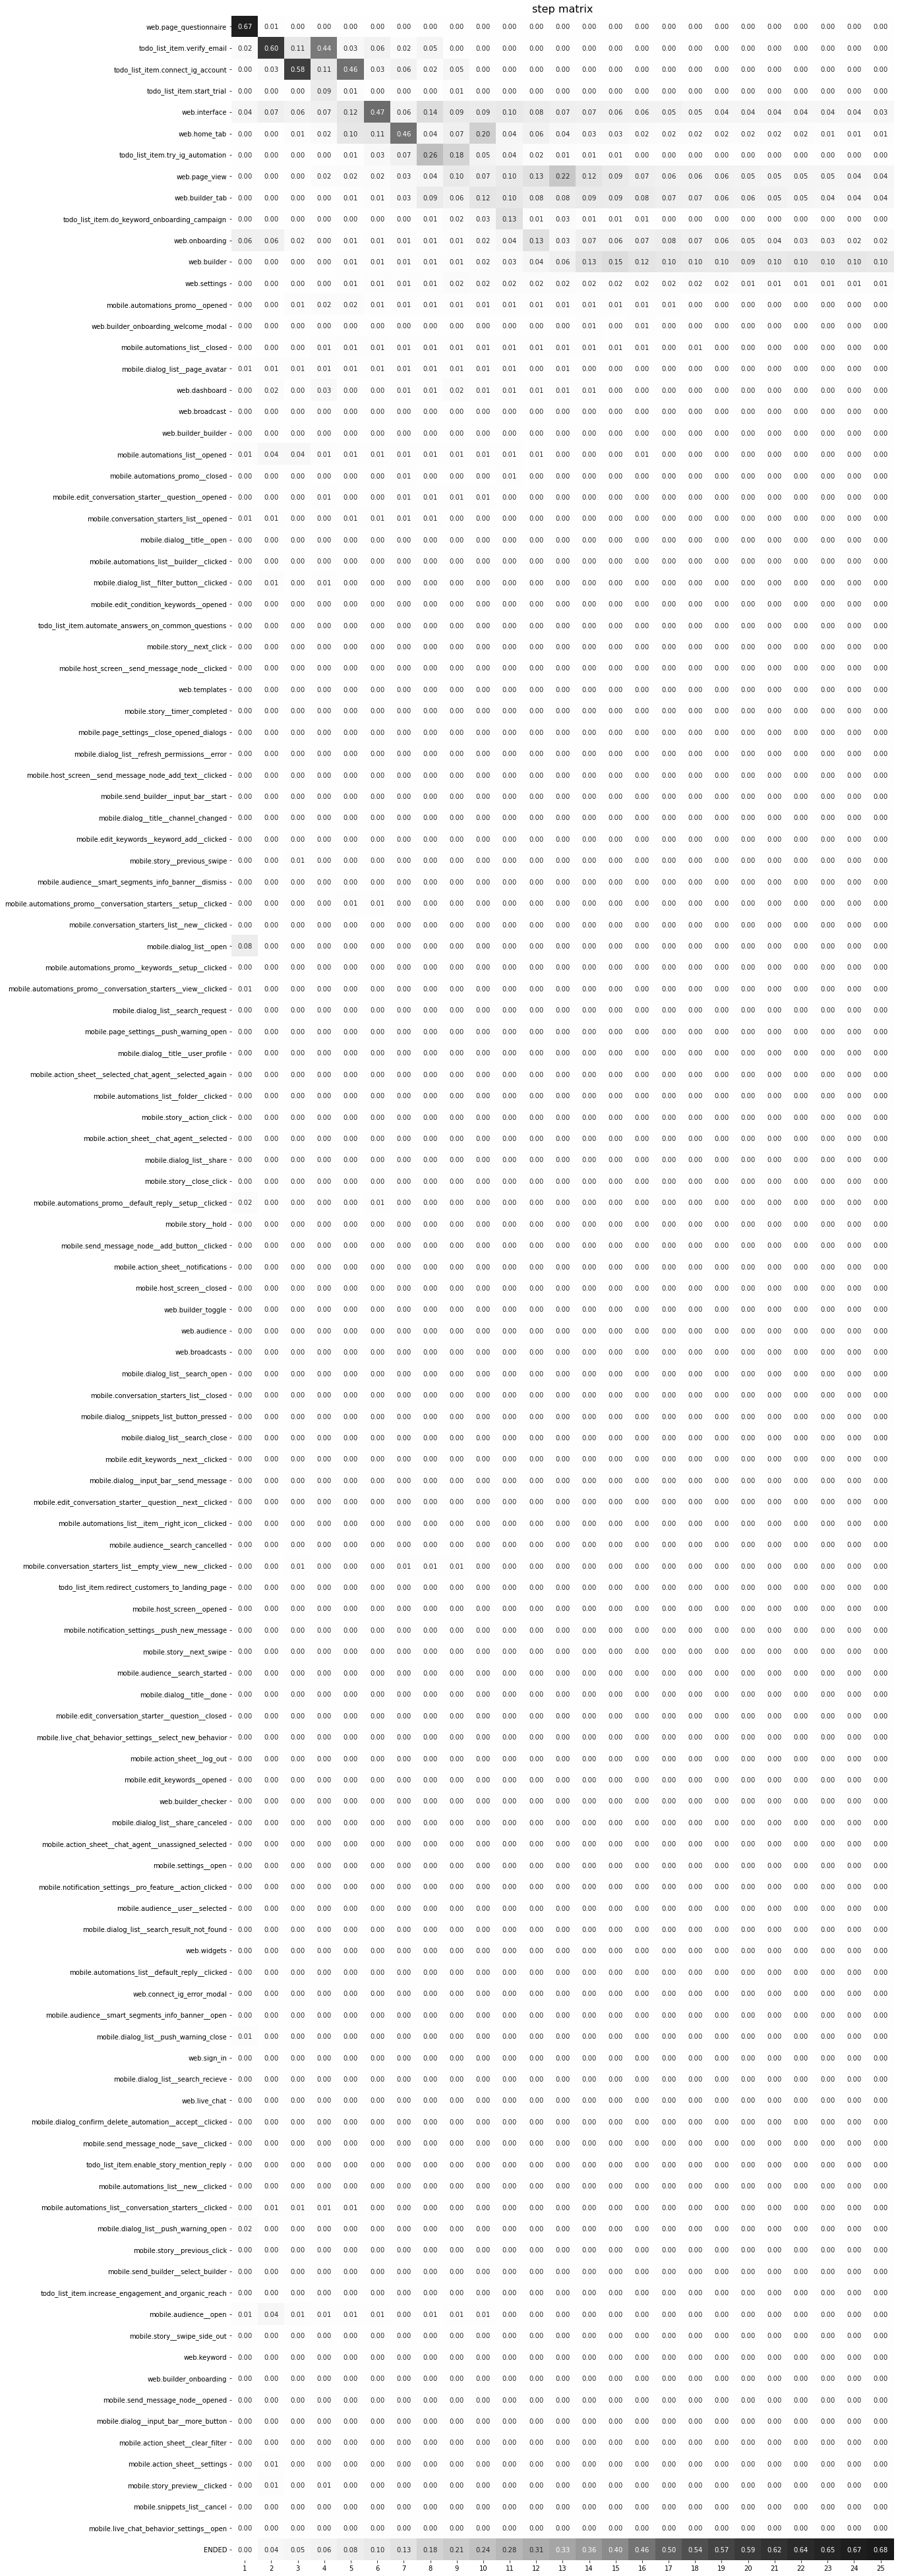

In [69]:
df_clean.rete.step_matrix(max_steps=25)

## Кластеризуем по эвентам в ретеншиниринг

In [71]:
df_cluster = df_clean[['client_id','event_dttm','event_type_subtype','support_provided','industry']]

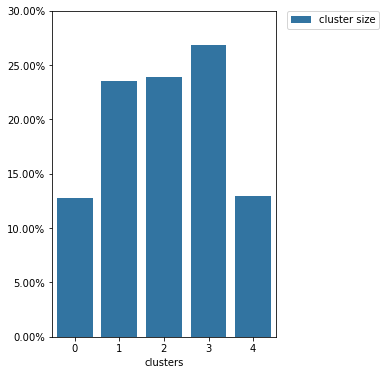

In [77]:
df_cluster.rete.get_clusters(method='kmeans',
                       feature_type='tfidf',
                       n_clusters=5,
                       ngram_range=(1,2),
                       plot_type='cluster_bar')

In [80]:
clus_0 = df_cluster.rete.filter_cluster(0)
clus_1 = df_cluster.rete.filter_cluster(1)
clus_2 = df_cluster.rete.filter_cluster(2)
clus_3 = df_cluster.rete.filter_cluster(3)
clus_4 = df_cluster.rete.filter_cluster(4)

## Кластер 0: энтузиасты

In [103]:
clus_0.rete.plot_graph(thresh=0.18,
                       norm_type='full',
                       weight_col='client_id',
                        )

'experiments/graph_2022-04-03 16_13_10_412527.html'

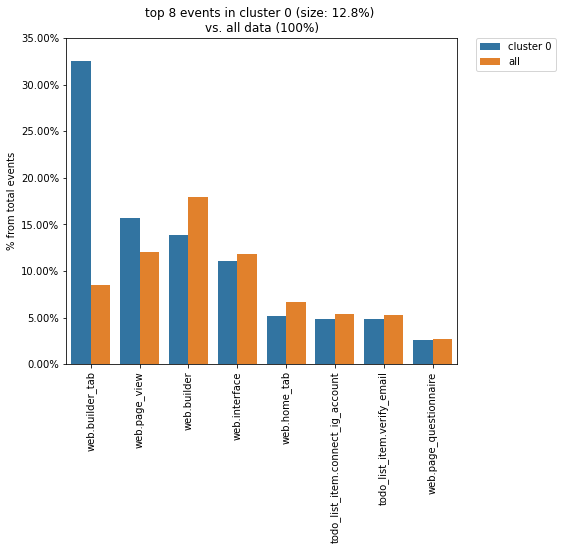

In [93]:
df_cluster.rete.cluster_event_dist(0)

Пользователи этого кластера выглядят так, будто они уже во всем разобрались. Высокий процент корректно подключивших свой инстаграм-аккаунт, высокое количество эвентов в блоке "билдер", при этом отсутствуют эвенты онбординга.

Этим пользователям, скорее всего, не нужна помощь. Они сильнее заинтересованы в новых фичах: технические интеграции, дополнительные возможности, медиа-элементы и проч.

## Кластер 1: Обучающиеся

In [88]:
clus_1.rete.plot_graph(thresh=0.15,
                       norm_type='full',
                       weight_col='client_id',
                        )

'experiments/graph_2022-04-03 15_22_11_291129.html'

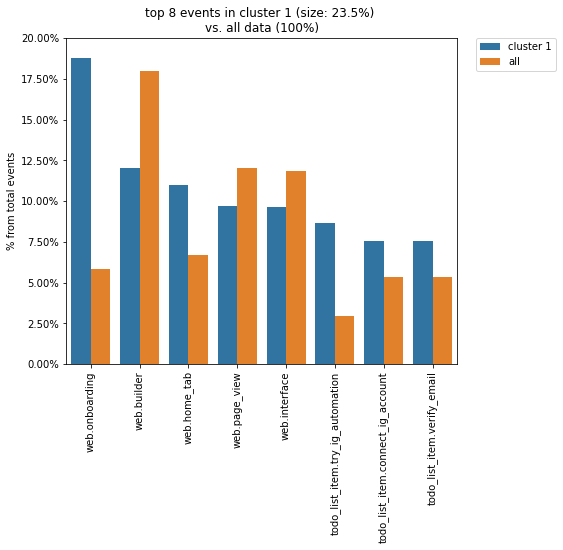

In [95]:
df_cluster.rete.cluster_event_dist(1)

В этот кластер попали те, кто много времени провел в онбординге. Основная часть пользователей попала в режим построения бота "билдер" только после прохождения онбординга. 
Очень интересно было бы сравнить конверсию в "активацию" между этим кластером и кластером 0, которые самоучки.

Для "обучающихся" важно много внимания уделять онбордингу 

## Кластер 2:Пропускаем

In [90]:
clus_2.rete.plot_graph(thresh=0.15,
                       norm_type='full',
                       weight_col='client_id',
                        )

'experiments/graph_2022-04-03 15_23_26_267803.html'

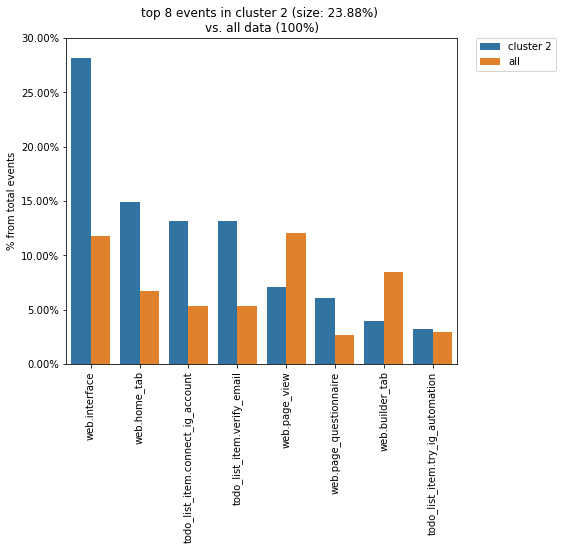

In [96]:
df_cluster.rete.cluster_event_dist(2)

## Кластер 3: Mobile rejectors

In [91]:
clus_3.rete.plot_graph(thresh=0.15,
                       norm_type='full',
                       weight_col='client_id',
                        )

'experiments/graph_2022-04-03 15_23_54_573867.html'

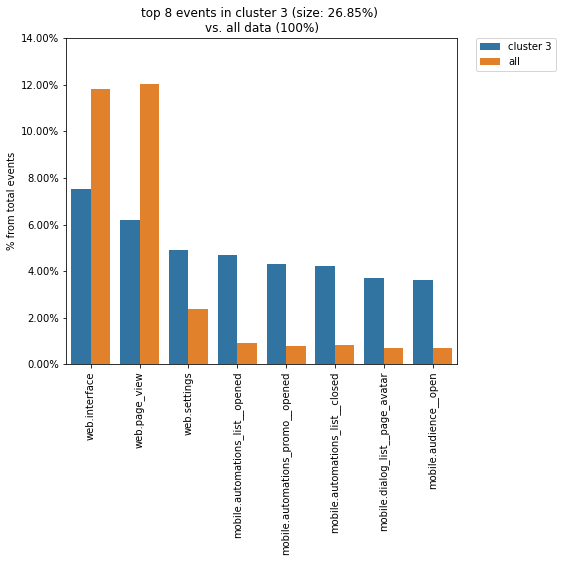

In [97]:
df_cluster.rete.cluster_event_dist(3)

Эти пользователи отличаются двумя принципиальными вещами: у них самый высокий процент вызова "мобильных" событий и самая низкая конверсия в подключенные Инстаграм аккаунты.

В этой ситуации нужно копать, но если предполагаемая связь окажется существующей, то им что-то не понравилось в мобильной версии и они отвалились. 

## Кластер 4: __

In [92]:
clus_4.rete.plot_graph(thresh=0.15,
                       norm_type='full',
                       weight_col='client_id',
                        )

'experiments/graph_2022-04-03 15_23_58_391758.html'

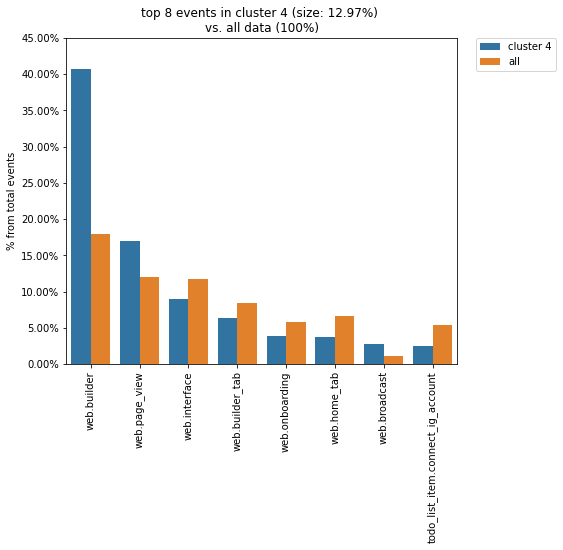

In [98]:
df_cluster.rete.cluster_event_dist(4)

# Одной колбасой

In [ ]:
import retentioneering
import numpy as np
import pandas as pd

#Загрузка датасета, заодно отсортируем
df = pd.read_csv('Dataset for Career Factory 22032022.csv')
df = df.sort_values(by=['client_id','event_dttm'])

df[['account_creationdate','client_creationdate','event_dttm']] = df[['account_creationdate','client_creationdate','event_dttm']].apply(pd.to_datetime)

#По заданию нам нужна только первая сессия. Ее идентификатора нет, поэтому вытащим из первого события и даты регистрации
df_red = df[['client_id','client_creationdate','event_dttm']]
df_red['since_reg'] = (df_red.event_dttm - df_red.client_creationdate).dt.days

#Делим на сессии по 30 минут

df_red['session'] = (df_red.groupby('client_id')['event_dttm']
                   .transform(lambda x: x.diff().gt('30Min').cumsum())
                )

#в датасет
df['since_reg'] = df_red.since_reg
df['session'] = df_red.session

#эвенты на группы
df['event_type'] = df['event_name'].str.split('.').str[0]
df['event_subtype'] = df['event_name'].str.split('.').str[1]
df["event_type_subtype"] = df["event_type"] + '.' + df["event_subtype"]

#оставляем только первую сессию, убираем системные события и события, случившиеся менее 10 раз
df_clean = df.loc[(df['since_reg'] == 0) & (df['session'] == 0) & (df['first_account_for_user'] == True)]
df_clean = df_clean.drop(df_clean[df_clean.event_type == 'system'].index)
event_count = df_clean.event_type_subtype.value_counts().reset_index()
event_less_10 = event_count[event_count.event_type_subtype < 10]['index'].values
df_clean = df_clean.drop(df_clean[df_clean.event_type_subtype.isin(event_less_10)].index)

#кластеризуем и рисуем в ретеншиниринге
retentioneering.config.update({
    'user_col': 'client_id',
    'event_col':'event_type_subtype',
    'event_time_col':'event_dttm',
})

df_cluster = df_clean[['client_id','event_dttm','event_type_subtype','support_provided','industry']]
df_cluster.rete.get_clusters(method='kmeans',
                       feature_type='tfidf',
                       n_clusters=5,
                       ngram_range=(1,2),
                       plot_type='cluster_bar')

clus_0 = df_cluster.rete.filter_cluster(0)
clus_1 = df_cluster.rete.filter_cluster(1)
clus_2 = df_cluster.rete.filter_cluster(2)
clus_3 = df_cluster.rete.filter_cluster(3)
clus_4 = df_cluster.rete.filter_cluster(4)

def cluster(cluster, clus_num):
    cluster.rete.plot_graph(thresh=0.18,
                       norm_type='full',
                       weight_col='client_id',
                        )
    df_cluster.rete.cluster_event_dist(clus_num)